심층신경망 훈련 중 발생되는 문제
* 그레이디언트 소실 또는 그레이디언트 폭주 문제에 직면할 수 있다.
* 대규모 신경망을 위한 훈련데이터가 충분하지 않거나 레이블을 만드는 작업에 비용이 너무 많이 들 수 있다.
* 수백만 개의 파라미터를 가진 모델은 훈련세트에 과대적합될 위험이 매우 크다. 특히 훈련 샘플이 충분하지 않거나 잡음이 많은 경우에 그렇다.

## 그레이디언트 소실과 폭주 문제 

알고리즘이 신경망의 모든 파라미터에 대한 오차 함수의 그레이디언트를 계산하면서 경사 하강법 단계에서 이 그레이디언트를 사용하여 각 파라미터를 수정한다. 그런데 알고리즘이 하위층으로 진행될 수록 그레이디언트가 점점 작아지는 경우가 많다. 경사 하강법이 하위층의 연결 가중치를 변경되지 않은 채로 둔다면 안타깝게도 훈련이 좋은 솔루션으로 수렴되지 않을 것이다. 이 문제를 **vanishing gradient**라고 한다.   

그레이디언트가 점점 커져서 여러 층이 비정상적으로 큰 가중치로 갱신되면 알고리즘은 diverse(발산)한다. 이 문제를 **exploding gradient**라고 한다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
from tensorflow import keras

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

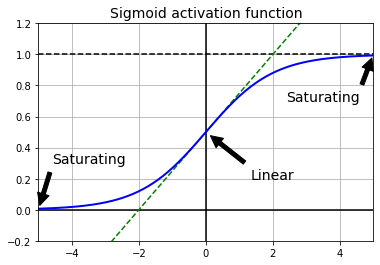

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

2010년에 세이비어 글로럿과 요슈아 벤지오 교수님이 발표한 논문에 따르면 로지스틱 시그모이드 활성화 함수와 그 당시 인기있던 가중치 초기화방법(평균0,분산1인 정규분포)의 조합이 문제가 된다고 발표하였다. 이 활성화 함수와 초기화 방식을 사용했을 때 각 층에서 출력의 분산이 입력의 분산보다 더 크다는 것을 밝혔다. 신경망의 위쪽으로 갈 수록 층을 지날 때마나 분산이 계속 커져 가장 높은 층에서는 활성화 함수가 0이나 1로 수렴한다.   

로지스틱 활성화 함수를 보면 입력이 커지면 0이나 1로 수렴해서 기울기가 0에 매우 가까워지는 것을 알 수 있다. 그래서 역전파가 될때 사실상 신경망으로 전파할 그레이디언트가 거의 없고 조금있는 그레이디언트는 최상위층에서부터 역전파가 진행되면서 점차 약해져서 실제로 아래ㅉ고 층에는 아무것도 도달하지 않게 된다.

## 글로럿과 He 초기화

글로럿과 벤지오는 논문에서 불안정한 그레이디언트 문제를 크게 완하하는 방법을 제안 

예측을 할때는 정방향으로, 그레이디언트를 역전파 할때는 역방향으로 양방향 신호가 적절하게 흘러야 한다. 저자들은 적절한 신호가 흐르기 위해서는 **각 층의 출력에 대한 분산이 입력에 대한 분산과 같아야한다고 주장  그리고 역방향에서 통과하기 전과 후의 그레이디언트 분산이 동일해야 한다.**   

사실 층의 입력과 출력연결 개수가 같지 않다면 이 두가지를 보장할 수 없다. 하지만 글로럿과 벤지오는 실전에서 매우 잘 작동한다고 입증된 대안을 제안,   

각층의 연결 가중치를 $ \sigma = 1 / \sqrt{n_\text{inputs}} $ or $ r = \sqrt{3} / \sqrt{n_\text{inputs}} $ 무작위로 초기화하는 것이다. 이는 글로럿 초기화


In [6]:
## Xavier 초기화와 He 초기화

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [7]:
# He 초기화 
# ReLu함수 이용 (2 / Fan_in )
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [8]:
# Fan_in 대신 Fan_out기반의 균등분포 He 초기화를 위해 Vatiance Scaling을 사용

init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## 수렴하지 않은 활성화 함수 

활성화 함수를 잘못 선택하면 자칫 그레이디언트의 소실이나 폭주로 이어질 수 있다. 일반적으로 사용되는 ReLU함수도 완벽하지 않다. dying ReLU로 알려진 문제가 존재, 훈련하는 동안 일부 뉴런이 0 이외의 값을 출력하지 않는다는 의미에서 죽었다고 한다. 어떤 경우에는 특히 큰 학습률을 사용하면 신경망의 뉴런 절반이 죽어 있기도 하는 경우가 있다. 뉴런의 가중치가 바뀌어 훈련세트에 있는 모든 샘플에 대해 입력의 가중치 합이 음수가 되면 뉴런이 죽게 된다. 가중치 합이 음수이면 ReLU함수의 그레이디언트가 0이 되므로 경사하강법이 더는 작동하지 않는다.

이를 해결하기 위해 **LeakyReLU**같은 변종이 사용된다. 이 함수는 LeakyReLU(Z) = max(az,z)로 정의 된다. 하이퍼파라미터 a가 이 함수가 leaky되는 정도를 결정한다. leaky 정도란 z<0 일때 이 함수의 기울기 이며, 일반적으로 0.01로 설정한다. 이 작은 기울기가 LeakyReLU를 절대 죽지 않게 만든다. 사실 a = 0.2로 하는 것이 a=0.01보다 더 나은 성능을 내는 것으로 보인다. 

RReLU 훈련하는 동안 주어진 범위에서 a를 무작위로 선택하고 테스트시에는 평균을 사용  
PReLU a가 훈련하는 동안 학습되는 방법  

ELU = $
\operatorname{ELU}_\alpha(z) =
\begin{cases}
\alpha(\exp(z) - 1) & \text{if } z < 0\\
z & if z \ge 0
\end{cases}
$
* z<0일때 음수값이 들어오므로 활성화 함수의 평균 출력이 0에 더 가까워진다. 하이퍼파라미터 a는 z가 큰 음수값일 떄 ELU가 수렴할 값을 정의한다. 보통 1로 설정 
* z<0이어도 그레이디언트가 0이 아니므로 죽은 뉴런을 만들지 않는다.
* a=1 이면 함수는 z=0에서 급격히 변동하지 않으므로 z=0을 포함해 모든 구간에서 매끄러워 경사하강법의 속도를 높여준다.
* But 계산이 느리다는 단점 존재

SELU - 훈련하는 동안 자기정규화가 일어나는 함수 
* 자기정규화가 일어나기 위해서는 입력 특성이 반드시 표준화 되어야 함, 모든 은닉층의 가중치는 르룬 정규분포 초기화로 초기화 되어야 한다.
* 네트워크는 일렬로 쌓은 층으로 구성, skip connetion과 같은 순차적이지 않은 구조에 SELU를 사용하면 자기 정규화되는 것이 보장되지 않는다. 

#### 심층 신경망 은닉층 활성화 함수 
#### SELU > ELU > LeakyReLU > ReLU > tanh > sigmoid

In [9]:
# LeakyReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

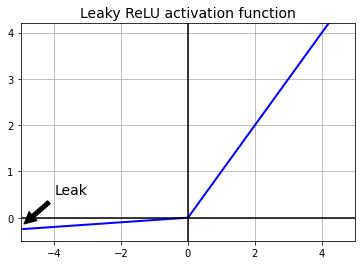

In [10]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])


plt.show()

In [11]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [13]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, kernel_initializer = 'he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer  = 'he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation = 'softmax')
    
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 6ms/step - loss: 1.2513 - accuracy: 0.6126 - val_loss: 0.8680 - val_accuracy: 0.7156
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7835 - accuracy: 0.7419 - val_loss: 0.7046 - val_accuracy: 0.7672
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6738 - accuracy: 0.7789 - val_loss: 0.6368 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6148 - accuracy: 0.7977 - val_loss: 0.5828 - val_accuracy: 0.8134
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5771 - accuracy: 0.8093 - val_loss: 0.5513 - val_accuracy: 0.8224
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5504 - accuracy: 0.8170 - val_loss: 0.5290 - val_accuracy: 0.8270
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5306 - accuracy: 0.8213 - val_loss: 0.5114 - val_ac

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 1.3105 - accuracy: 0.6044 - val_loss: 0.8985 - val_accuracy: 0.7062
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8056 - accuracy: 0.7339 - val_loss: 0.7192 - val_accuracy: 0.7618
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6877 - accuracy: 0.7763 - val_loss: 0.6469 - val_accuracy: 0.7908
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6247 - accuracy: 0.7965 - val_loss: 0.5887 - val_accuracy: 0.8148
Epoch 5/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5841 - accuracy: 0.8092 - val_loss: 0.5549 - val_accuracy: 0.8248
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5548 - accuracy: 0.8166 - val_loss: 0.5306 - val_accuracy: 0.8314
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5329 - accuracy: 0.8225 - val_loss: 0.5110 - val_ac

In [21]:
# ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

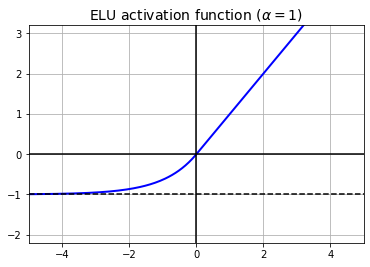

In [22]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [23]:
keras.layers.Dense(10, activation="elu")

####  SELU
Günter Klambauer, Thomas Unterthiner, Andreas Mayr는 2017년 한 훌륭한 논문에서 SELU 활성화 함수를 소개했습니다. 훈련하는 동안 완전 연결 층만 쌓아서 신경망을 만들고 SELU 활성화 함수와 LeCun 초기화를 사용한다면 자기 정규화됩니다. 각 층의 출력이 평균과 표준편차를 보존하는 경향이 있습니다. 이는 그레이디언트 소실과 폭주 문제를 막아줍니다. 그 결과로 SELU 활성화 함수는 이런 종류의 네트워크(특히 아주 깊은 네트워크)에서 다른 활성화 함수보다 뛰어난 성능을 종종 냅니다. 따라서 꼭 시도해 봐야 합니다. 하지만 SELU 활성화 함수의 자기 정규화 특징은 쉽게 깨집니다. ℓ1나 ℓ2 정규화, 드롭아웃, 맥스 노름, 스킵 연결이나 시퀀셜하지 않은 다른 토폴로지를 사용할 수 없습니다(즉 순환 신경망은 자기 정규화되지 않습니다). 하지만 실전에서 시퀀셜 CNN과 잘 동작합니다. 자기 정규화가 깨지면 SELU가 다른 활성화 함수보다 더 나은 성능을 내지 않을 것입니다.

https://arxiv.org/pdf/1706.02515.pdf

In [24]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [25]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

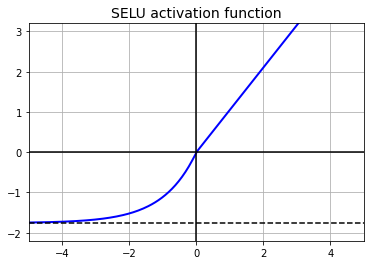

In [26]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

기본적으로 SELU 하이퍼파라미터(`scale`과 `alpha`)는 각 뉴런의 평균 출력이 0에 가깝고 표준 편차는 1에 가깝도록 조정됩니다(입력은 평균이 0이고 표준 편차 1로 표준화되었다고 가정합니다). 이 활성화 함수를 사용하면 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 거의 평균이 0이고 표준 편차를 1로 유지합니다. 이를 통해 그레이디언트 폭주와 소실 문제를 피할 수 있습니다:

In [27]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [28]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [31]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [32]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 448s 259ms/step - loss: 1.3169 - accuracy: 0.4970 - val_loss: 0.9196 - val_accuracy: 0.6382
Epoch 2/5
1719/1719 [==============================] - 442s 257ms/step - loss: 0.7654 - accuracy: 0.7206 - val_loss: 0.6312 - val_accuracy: 0.7798
Epoch 3/5
1719/1719 [==============================] - 447s 260ms/step - loss: 0.6127 - accuracy: 0.7776 - val_loss: 0.5685 - val_accuracy: 0.8004
Epoch 4/5
1719/1719 [==============================] - 446s 260ms/step - loss: 0.5633 - accuracy: 0.8031 - val_loss: 0.5474 - val_accuracy: 0.8150
Epoch 5/5
1719/1719 [==============================] - 447s 260ms/step - loss: 0.8516 - accuracy: 0.6947 - val_loss: 0.7973 - val_accuracy: 0.6782


## GELU (Ganussian Error Linear Unit) 

GELU 함수는 dropout, zoneout, ReLU 함수의 특성을 조합하여 유도 되었다. 먼저 ReLU함수는 입력 x의 부호에 따라 1이나 0을 deterministic하게 곱하고 dropout은 1이다 0을 stochastic하게 곱하게 된다. 따라서 GELU에서는 이 두개념을 합쳐 0 또는 1로 이루어진 마스크를 stochastic하게 곱하면서도 stochasticity를 x의 부호가 아닌 값에 의해서 정하고자 한다.

$ x*1/2 [1+ erf + (x / \sqrt2) ] $ -> $x*sigmoid(1.70*2x)$ , erf = error function  

GELU 함수는 모든 점에서 미분 가능하고 단조증가함수가 아니다. 이는 비선형 활성화 함수 목적에 맞게 더욱 복잡한 전체 함수를 모델링하는데 도움이 된다. 또한 ReLU함수는 x의 부호에 대해서 gating되는 것과 달리 GELU함수는 x가 다른 입력에 비해서 얼마나 큰지에 대한 비율로 gating되니 확률적인 해석이 가능해지고 함수 형태가 미분가능하게 된다. 



### 전체적인 요약 

Sigmoid / tanh 활성화 함수가 bounded 되어 있어 vanishing gradient 현상을 유발하고 이를 대체하기 위해 ReLU 함수가 널리 사용되고 있지만 ReLU는 입력이 음수가 되어버리는 순간 기울기가 0이므로 그 노드에 연결된 파라미터들이 업데이트가 되지 않는다. 이러한 현상이 neural networks에서 자주 발생해 neuron 대부분이 0이 되어버리는 sparsity가 발생할 때는 dying ReLU 현상이라고 한다. 이 경우는 자주 일어나지는 않지만 매우 큰 lr를 갖거나 매우 큰 움수 bias 항을 가지는 경우에 ReLU 입력이 급격하게 음수가 되어 버릴 때 주로 발생한다.  


이를 극복하기 위해 Leaky ReLU 같이 음수 부분에 작은 기울기를 주는 활성화 함수가 개발이 되었지만 이 함수들은 음수에 대해서bounded (bounded below )되어있지 않기 때문에 feature 학습에 부정적인 영향을 끼질 가능성이 있다.(음수가 곱해지는 것이 누적되면 최종적인 활성화가 잘 되지 않는다.) 따라서 GELU, Mish, Swish 같이 음수 부분이 값을 가지지만 너무 커지지 않게 bounded하면서 기울기가 잘 정의되어 있는 함수가 점점 넓게 사용되고 있다. 

## 배치 정규화 

ELU와 함께 He 초기화를 사용하면 훈련 초기 단계에서 그레이디언트 소실이나 폭주 문제를 크게 감소시킬 수 있지만, 훈련하는 동안 다시 발생하지 않으리란 보장은 없다. 

-----

2015년 그레이디언트 소실과 폭주 문제를 해결하기 위해 배치 정규화 기법이 제안됨, 이 기법은 각 층에서 활성화 함수를 통과하기 전이나 후에 모델에 연산을 하나 추가한다. 연산은 단순하게 입력을 원점에 맞추고 정규화한 다음, 각 층에서 두 개의 새로운 파라미터로 결과값의 스케일을 조정하고 이동시킨다. 하나는 스케일 조정에, 다른 하나는 이동에 사용한다. 많은 경우 신경망의 첫 번째 층으로 배치 정규화를 추가하면 훈련 세트를 표준화할 필요가 없다.배치 정규화 층이 이런 역할을 대신 한다.(한 번에 하나의 배치만 처리하기 때문에 근사적이다. 또한 입력 특성마다 스케일을 조정하고 이동할 수 있다. 

입력 데이터를 원점에 맞추고 정규화 하려면 알고리즘은 평균과 표준편차를 추정해야 한다. 이를 위해 현재 미니배체에서 입력의 평균과 표준편차를 평가 한다.  

$
\begin{split}
1.\quad & \mathbf{\mu}_B = \dfrac{1}{m_B}\sum\limits_{i=1}^{m_B}{\mathbf{x}^{(i)}}\\
2.\quad & {\mathbf{\sigma}_B}^2 = \dfrac{1}{m_B}\sum\limits_{i=1}^{m_B}{(\mathbf{x}^{(i)} - \mathbf{\mu}_B)^2}\\
3.\quad & \hat{\mathbf{x}}^{(i)} = \dfrac{\mathbf{x}^{(i)} - \mathbf{\mu}_B}{\sqrt{{\mathbf{\sigma}_B}^2 + \epsilon}}\\
4.\quad & \mathbf{z}^{(i)} = \gamma \hat{\mathbf{x}}^{(i)} + \beta
\end{split}
$

* $ \mathbf{\mu}_B $ 는 미니배체 B에 대해 평가한 입력의 평균 벡터이다.(입력마다 하나의 평균을 가짐) 
* ${\mathbf{\sigma}_B}^2 $ 미니배치에 대해 평가한 입력의 표준편차 벡터이다.
* $\hat{\mathbf{x}}^{(i)}$ 평균이 0이고 정규화된 샘플 i의 입력이다.
* 감마는 층의 출력 스케일 파라미터 벡터이다.
* 엡실론은 분모가 0이 되는 것을 막기 위한 작은 숫자 smoothing term
* $\mathbf{z}^{(i)}$ 배치 정규화 연산의 출력이다. 즉 입력의 스케일을 조정하고 이동시킨 것이다.

---- 


배치 정규화를 사용할 때 에포크 마다 더 많은 시간이 걸리므로 훈련이 오히려 느려질 수 있다. 하지만 배치 정규화를 사용하면 수렴이 훨씬 빨라지므로 보통 상쇄된다. 따라서 더 적은 에포크로 동일한 성능에 도달할 수 있다. 


In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation = 'elu', kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation = 'elu',kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation = 'softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

배치 정규화는 네개의 파라미터 감마, 베타, 뮤, std를 추가한다. (첫 번째 층 4*784 = 3136) , 마지막 두개의 파라미터는 이동평균이다. 이 파라미터는 역전파로 학습되지 않기 때문에 케라스는 Non-trainable로 분류한다. 

In [4]:
[[var.name, var.trainable] for var in model.layers[1].variables]

[['batch_normalization/gamma:0', True],
 ['batch_normalization/beta:0', True],
 ['batch_normalization/moving_mean:0', False],
 ['batch_normalization/moving_variance:0', False]]

두개는(역전파로) 훈련되고 두개는 훈련되지 않는다.

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

배치 정규화 눈문의 저자들은 활성화 함수 이후보다 활성화 함수 이전에 배치 정규화 층을 추가하는 것이 좋다고 조언한다. 하지만 작업에 따라 선호되는 방식이 달라서 이 조언에 대해서는 논란이 있다. 두 가지 방법 모두 실험해보고 어떤 것이 주어진 데이터셋에 가장 잘 맞는지 확인하는 것이 좋다. 활성화 함수 전에 배치 정규화 츠응ㄹ 추가하려면 은닉층에서 활성화 함수를 지정하지 말고 배치 정규화 층 뒤에 별도의 층으로 추가해야 한다. 또한 배치 정규화 층은 입력마다 이동 파라미터를 포함하기 때문에 이전 층에서 편향을 뺄 수 있다.

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=7,
                    validation_data=(X_valid, y_valid))

Epoch 1/7
1719/1719 [==============================] - 17s 9ms/step - loss: 1.0287 - accuracy: 0.6782 - val_loss: 0.6561 - val_accuracy: 0.7902
Epoch 2/7
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6638 - accuracy: 0.7865 - val_loss: 0.5458 - val_accuracy: 0.8268
Epoch 3/7
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5810 - accuracy: 0.8088 - val_loss: 0.4941 - val_accuracy: 0.8380
Epoch 4/7
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5366 - accuracy: 0.8211 - val_loss: 0.4619 - val_accuracy: 0.8462
Epoch 5/7
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5052 - accuracy: 0.8281 - val_loss: 0.4407 - val_accuracy: 0.8516
Epoch 6/7
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4860 - accuracy: 0.8345 - val_loss: 0.4250 - val_accuracy: 0.8542
Epoch 7/7
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4661 - accuracy: 0.8408 - val_loss: 0.4127 - val_accuracy

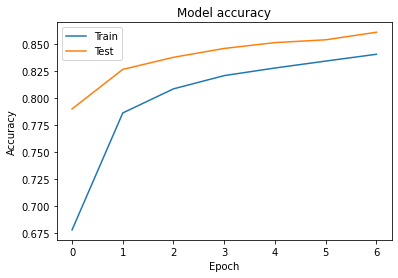

In [13]:

# 학습 정확성 값과 검증 정확성 값을 플롯팅 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


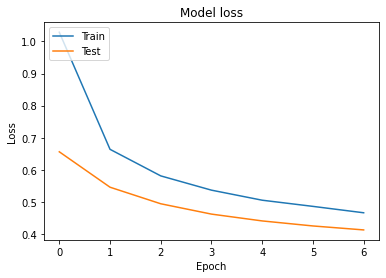

In [11]:
# 학습 손실 값과 검증 손실 값을 플롯팅
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 그레이디언트 클리핑 

그레이디언트 폭주 문제를 완화하는 다른 방법은 역전파될 때 일정 임곗값을 넘어서 지 못하게 그레이디언트를 잘라내는 것이다. 이를 그레이디언트 클리핑이라고 한다. 

In [14]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [15]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## 사전 훈련된 층 재사용 

일반적으로 아주 큰 규모의 DNN을 처음부터 새로 훈련하는 것은 좋지 않다. 해결하려는 것과 비슷한 유형의 문제를 처리한 신경망이 이미 있는지 찾아본 다음 그 신경망의 하위층을 재사용하는 것이 좋다.이를 전이 학습이라고 한다.   

만약 원래 문제에서 사용한 것과 크기가 다른 이미지를 입력으로 사용한다면 원본 모델에 맞는 크기로 변경하는 전처리 단계를 추가해야한다. 일반적으로 전이 학습은 저수준 특성이 비슷한 입력에서 잘 작동한다.  

-----

보통 원본 모델의 출력층을 바꿔야 한다, 이 층이 새로운 작업에 가장 유용하지 않은 층이고 새로운 작업에 필요한 출력개수와 맞지 않을 수도 있기 때문이다. 비슷하게 원본 모델의 상위 은닉층은 하위 은닉층보다 덜 유용하다. 새로운 작업에 유용한 고수준 특성은 원복 작업에서 유용했던 특성과는 다르기 때문이다. 재사용할 층 개수를 잘 선정하는 것이 필요하다.  

먼저 재사용하는 층을 모두 동결한다.(즉 경사 하강법으로 가중치가 바뀌지 않도록 훈련되지 않는 가중치로 만든다.) 그 다음 모델을 훈련하고 성능을 평가한다.  맨 위에 있는 한두개의 은닉층의 동결을 해제하고 역전파를 통해 가중치를 조정하여 성능이 향상되는지 확인한다. 훈련 데이터가 많을 수록 많은 층의 동결을 해제할 수 있다. 재사용층의 동결을 해제할 때는 학습률을 줄이는 것이 좋다. 가중치를 세밀하게 튜닝하는데 도움이 된다. 

패션 MNIST 훈련 세트를 두 개로 나눔:
* `X_train_A`: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
* `X_train_B`: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트

검증 세트와 테스트 세트도 이렇게 나눕니다. 하지만 이미지 개수는 제한하지 않습니다.

A 세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B 세트(이진 분류)를 해결해 보겠습니다. A 작업에서 B 작업으로 약간의 지식이 전달되기를 기대합니다. 왜냐하면 A 세트의 클래스(스니커즈, 앵클 부츠, 코트, 티셔츠 등)가 B 세트에 있는 클래스(샌달과 셔츠)와 조금 비슷하기 때문입니다. 하지만 `Dense` 층을 사용하기 때문에 동일한 위치에 나타난 패턴만 재사용할 수 있습니다(반대로 합성곱 층은 훨씬 많은 정보를 전송합니다. 학습한 패턴을 이미지의 어느 위치에서나 감지할 수 있기 때문입니다. CNN 장에서 자세히 알아 보겠습니다).

In [16]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [17]:
X_train_A.shape

(43986, 28, 28)

In [18]:
X_train_B.shape

(200, 28, 28)

In [19]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [20]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [21]:
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [22]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [23]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 22s 16ms/step - loss: 0.6033 - accuracy: 0.7983 - val_loss: 0.4064 - val_accuracy: 0.8555
Epoch 2/20
1375/1375 [==============================] - 20s 15ms/step - loss: 0.3630 - accuracy: 0.8748 - val_loss: 0.3340 - val_accuracy: 0.8837
Epoch 3/20
1375/1375 [==============================] - 20s 15ms/step - loss: 0.3193 - accuracy: 0.8884 - val_loss: 0.3033 - val_accuracy: 0.8969
Epoch 4/20
1375/1375 [==============================] - 20s 15ms/step - loss: 0.2979 - accuracy: 0.8972 - val_loss: 0.2904 - val_accuracy: 0.9001
Epoch 5/20
1375/1375 [==============================] - 20s 15ms/step - loss: 0.2841 - accuracy: 0.9016 - val_loss: 0.2772 - val_accuracy: 0.9041
Epoch 6/20
1375/1375 [==============================] - 26s 19ms/step - loss: 0.2742 - accuracy: 0.9051 - val_loss: 0.2706 - val_accuracy: 0.9078
Epoch 7/20
1375/1375 [==============================] - 21s 15ms/step - loss: 0.2661 - accuracy: 0.9080 - val_loss: 0.2726 -

In [24]:
model_A.save("my_model_A.h5")

In [25]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [26]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [27]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 151ms/step - loss: 0.7429 - accuracy: 0.6400 - val_loss: 0.6349 - val_accuracy: 0.6704
Epoch 2/20
7/7 [==============================] - 0s 54ms/step - loss: 0.5761 - accuracy: 0.7350 - val_loss: 0.5110 - val_accuracy: 0.7809
Epoch 3/20
7/7 [==============================] - 0s 54ms/step - loss: 0.4605 - accuracy: 0.8200 - val_loss: 0.4307 - val_accuracy: 0.8408
Epoch 4/20
7/7 [==============================] - 0s 54ms/step - loss: 0.3847 - accuracy: 0.8750 - val_loss: 0.3722 - val_accuracy: 0.8631
Epoch 5/20
7/7 [==============================] - 0s 55ms/step - loss: 0.3278 - accuracy: 0.9200 - val_loss: 0.3290 - val_accuracy: 0.8895
Epoch 6/20
7/7 [==============================] - 0s 54ms/step - loss: 0.2855 - accuracy: 0.9350 - val_loss: 0.2963 - val_accuracy: 0.9037
Epoch 7/20
7/7 [==============================] - 0s 60ms/step - loss: 0.2541 - accuracy: 0.9400 - val_loss: 0.2717 - val_accuracy: 0.9189
Epoch 8/20
7/7 [==========

In [28]:
model_B.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 1)                

In [29]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

`model_B_on_A`와 `model_A`는 층을 공유하기 때문에 하나를 훈련하면 두 모델이 업데이트됩니다. 이를 피하려면 `model_A`를 클론한 것을 사용해 `model_B_on_A`를 만들어야 합니다:

In [30]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [31]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

새로운 출력층이 랜덤하게 초기화 되어 있으므로 큰 오차를 만들것이다. 따라서 큰 오차 그레이디언트가 재사용된 가중치를 망칠 수 있다. 이를 피하는 방법은 처음 몇번의 에포크 동안 재사용된 층을 동결하고 새로운 층에게 적절한 가중치를 학습할 시간을 주는 것이다. 이를 위해 모든층의 trainable속성을 False로 지정하고 모델을 컴파일 한다.  

몇 번의 에포크 동안 모델을 훈련할 수 있다. 그 다음 재사용된 층의 동결을 해제하고 작업 B에 맞게 재사용된 층을 세밀하게 튜닝하기 위해 훈련을 계속한다. 일반적으로 재사용된 층의 동결을 해제한 후에 학습률을 낮추는 것이 좋다. 이렇게 하면 재사용된 가중치가 망가지는 것을 막아준다.

In [32]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 80ms/step - loss: 1.0410 - accuracy: 0.3400 - val_loss: 1.0128 - val_accuracy: 0.3398
Epoch 2/4
7/7 [==============================] - 0s 47ms/step - loss: 0.9332 - accuracy: 0.4000 - val_loss: 0.9161 - val_accuracy: 0.4006
Epoch 3/4
7/7 [==============================] - 0s 48ms/step - loss: 0.8427 - accuracy: 0.4400 - val_loss: 0.8313 - val_accuracy: 0.4625
Epoch 4/4
7/7 [==============================] - 0s 46ms/step - loss: 0.7638 - accuracy: 0.4900 - val_loss: 0.7545 - val_accuracy: 0.5193
Epoch 1/16
7/7 [==============================] - 1s 87ms/step - loss: 0.5908 - accuracy: 0.6700 - val_loss: 0.4590 - val_accuracy: 0.8215
Epoch 2/16
7/7 [==============================] - 0s 55ms/step - loss: 0.3989 - accuracy: 0.8450 - val_loss: 0.3455 - val_accuracy: 0.8834
Epoch 3/16
7/7 [==============================] - 0s 54ms/step - loss: 0.3079 - accuracy: 0.8950 - val_loss: 0.2754 - val_accuracy: 0.9128
Epoch 4/16
7/7 [===============

In [33]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 1s 8ms/step - loss: 0.0789 - accuracy: 0.9875


[0.07888157665729523, 0.9875000715255737]

## 비지도 사전훈련 

레이블 되지 않은 훈련 데이터를 많이 모을 수 있다면 이를 사용하여 오코인코더나 생성적 적대 신경망과 같은 비지도 학습 모델을 훈련할 수 있다. 그 다음 오토인코더나 GNN 판별자의 하위층을 재사용하고 그 위에 새로운 작업에 맞는 출력층을 추가할 수 있따. 그 다음 지도학습으로 최종 네트워크를 세밀하게 튜닝한다.

#### 자기지도 학습은 데이터에서 스스로 레이블을 생성하고 지도 학습 기법으로 레이블된 데이터셋에서 모델을 훈련하는 방법

## 고속 옵티마이저 

### 모멘텀 최적화 

모멘텀 최적화는 이전 그레이디언트가 얼마 였는지를 상당히 중요하게 생각한다. 매 반복에서 현재 그레이디언트를(학습률 n 곱한 후) 모멘텀 벡터 V에 더하고 이 값을 빼는 방식으로 가중치를 갱신한다. 다시 말해 그레이디언트를 속도라 아니라 가속도로 사용한다. 일종의 마찰저항을 표현하고 모멘텀이 너무 커지는 것을 막기 위해 알고리즘에서는 모멘텀이라는 새로운 하이퍼파라미터 B가 등장한다. 이 값은 0과 1사이로 설정되어야 한다. 일반적인 모멘텀 값은 0.9이다.   

이 기법은 local optima을 건너뛰도록하는데도 도움이 된다. 

**Momentum algorithm**

1. $\mathbf{m} \gets \beta \mathbf{m} - \eta \nabla_\boldsymbol{\theta}J(\boldsymbol{\theta})$
2. $\boldsymbol{\theta} \gets \boldsymbol{\theta} + \mathbf{m}$

In [2]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### 네스테로프 가속 경사 

현재 위치가 ${\theta}$가 아니라 모멘텀의 방향으로 조금 앞선 ${\theta} + B_m$에서 비용 함수의 그레이디언트를 계산하는 것이다. 일반적으로 모멘텀 벡터가 올바른 방향(최적점을 향하는 방향)을 가리킬 것이므로 이런 변경이 가능하다.  

수학적 설명력은 뛰어나나 실제 상황에서는 잘 사용되지 않는다. 


**Nesterov Accelerated Gradient algorithm**

1. $\mathbf{m} \gets \beta \mathbf{m} - \eta \nabla_\boldsymbol{\theta}J(\boldsymbol{\theta} + \beta \mathbf{m})$
2. $\boldsymbol{\theta} \gets \boldsymbol{\theta} + \mathbf{m}$

In [3]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)